In [132]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os
import datetime

In [133]:
# Get current working directory
os.getcwd()

#Set working directory
os.chdir('C:\\Users\\king molly\\Documents\\')

pd.set_option('max_rows', 1000)
pd.set_option('max_columns', 1000)

In [ ]:
# Business 

# Data Understanding Phase

In [134]:
# Read data
listings = pd.read_csv('listings.csv')

In [135]:
# Evaluate dataset size
print(listings.shape)

(8533, 16)


In [136]:
# Evaluate dataset summary stats
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8.533000e+03,8.533000e+03,0.0,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,7338.000000,8533.000000,8533.000000
mean,2.568287e+07,9.136513e+07,NaN,41.900679,-87.664596,180.549162,5.577523,41.096215,2.518688,11.403375,177.255362
std,1.108914e+07,8.758527e+07,NaN,0.057041,0.041218,474.186707,21.054040,60.453440,2.097065,23.964151,130.468250
min,2.384000e+03,2.140000e+03,NaN,41.650990,-87.934660,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,1.805955e+07,1.572523e+07,NaN,41.874500,-87.686930,65.000000,1.000000,3.000000,0.860000,1.000000,64.000000
50%,2.769444e+07,5.597679e+07,NaN,41.902960,-87.661150,101.000000,2.000000,17.000000,2.030000,2.000000,162.000000
75%,3.538766e+07,1.572620e+08,NaN,41.940000,-87.634400,176.000000,2.000000,54.000000,3.710000,7.000000,323.000000
max,4.026441e+07,3.106326e+08,NaN,42.022280,-87.537900,10000.000000,1000.000000,603.000000,20.830000,119.000000,365.000000


In [137]:
# Examine a sample of records
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Walk to UChicago, 10 min train to McCormick Place",2613,Rebecca,NaN,Hyde Park,41.78886,-87.58671,Private room,50,2,176,2019-11-13,2.97,1,349
1,4505,One Great Apartment. 384 Great Reviews. 1 Bad ...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,117,1,390,2019-11-10,2.99,1,251
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,80,2,370,2019-11-04,2.93,1,328
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,150,4,49,2019-10-23,0.72,11,289
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79708,-87.59195,Private room,35,2,43,2019-10-28,0.70,5,258


# Data Preparation Phase

In [138]:
# Treat missing values
# All neighborhood_group records missing - drop that col
listings.isnull().sum()
listings = listings.dropna(how = 'all', axis = 1)

In [139]:
# Handle missing values in cols with sufficient complete data
listings['reviews_per_month'] = listings['reviews_per_month'].fillna(0)
listings['last_review'] = listings['last_review'].fillna('1900-01-01')

In [140]:
# Test filled records
listings.tail(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8523,40235958,MINUTES AWAY FROM ALL TOURIST ATTRACTIONS,55976787,Natalia,Near West Side,41.88038,-87.64144,Private room,10,1,0,1900-01-01,0.0,73,97
8524,40250846,Warm and inviting 3 Bedroom on top floor,23975645,Jeremy,Humboldt Park,41.91247,-87.70840,Entire home/apt,70,1,0,1900-01-01,0.0,2,364
8525,40253212,Private Room near 31st street Beach,120476012,Fahad,Douglas,41.83636,-87.61497,Private room,30,1,0,1900-01-01,0.0,2,79
8526,40260588,Convenient luxury bedroom near Downtown and UIC,114503989,Jesson,Near West Side,41.87655,-87.64696,Private room,57,7,0,1900-01-01,0.0,1,27
8527,40261070,❤️ Winter Special! Newly Renovated Stylish 3BR,259688317,Sofia,West Ridge,41.99700,-87.70317,Entire home/apt,100,1,0,1900-01-01,0.0,6,365
8528,40262251,Perfect Old Town condo you will love. Come stay!!,2912333,Benjamin,Near North Side,41.90812,-87.63619,Entire home/apt,299,5,0,1900-01-01,0.0,1,74
8529,40263536,☼O'Hare-1Bed-Private Bath-Rosemont-AllState Arena,50413447,Christian,Ohare,42.00712,-87.93466,Private room,42,1,0,1900-01-01,0.0,2,79
8530,40264107,One queen bed room in cozy house northwest side,35065108,Kevin,Belmont Cragin,41.93642,-87.76947,Private room,69,1,0,1900-01-01,0.0,4,173
8531,40264148,"☼2bed 1bath O'hare, Allstate arena,Casino,Rose...",50413447,Christian,Ohare,42.00712,-87.93466,Private room,72,1,0,1900-01-01,0.0,2,79
8532,40264411,Modern Private Room/ quick walk to the train!,178275885,Jada,Lower West Side,41.85425,-87.68577,Private room,43,1,0,1900-01-01,0.0,3,157


In [141]:
# Evaluate categorical variables and treat as needed
cats = ['neighbourhood','room_type']

for cat in cats:
    print(listings[cat].value_counts())

West Town                 1048
Near North Side            875
Lake View                  720
Logan Square               582
Loop                       462
Near West Side             454
Lincoln Park               429
Uptown                     273
Lower West Side            269
Irving Park                215
Edgewater                  215
Avondale                   190
Near South Side            185
North Center               177
Rogers Park                172
Bridgeport                 166
Grand Boulevard            124
Lincoln Square             123
Hyde Park                  119
Woodlawn                   105
Portage Park               102
Armour Square               97
Albany Park                 94
West Ridge                  93
East Garfield Park          90
South Shore                 88
Douglas                     83
Humboldt Park               77
Austin                      73
Kenwood                     67
South Lawndale              50
Jefferson Park              49
North La

In [142]:
# Feature Engineering Part 1
# First create suburb flag variable
suburbs_list = ['Ohare','Norwood Park','Edison Park','Dunning','Rogers Park','West Ridge','Forest Glen','Jefferson Park']
listings['suburbs'] = listings['neighbourhood'].map(lambda x: 1 if x in suburbs_list else 0)


# Then aggregate neighborhoods with small counts into an "Other" category
vals_to_update = ['West Pullman','Clearing','Montclare','South Deering','Avalon Park','Edison Park','Mount Greenwood',
                  'Riverdale','Hegewisch','Gage Park','Archer Heights','Washington Heights','Morgan Park','Roseland',
                  'West Elsdon','Beverly','Chicago Lawn','Fuller Park','West Englewood','Ashburn','Forest Glen','Pullman',
                  'Ohare','Auburn Gresham','West Lawn','Chatham','South Chicago','Garfield Ridge','Hermosa']

listings['neighbourhood'] = listings.neighbourhood.replace(to_replace=[vals_to_update],value='Other')

In [143]:
# Dummy variable creation
# Encode dummy variables
cat_list = ['neighbourhood','room_type']
dummy_df = pd.get_dummies(listings, columns=cat_list)

In [145]:
# Feature Engineering Part 2
now = pd.to_datetime(datetime.datetime.now())

# Ensure dates read as dates
dummy_df['last_review'] = pd.to_datetime(dummy_df['last_review'])

# Engineer new features 
dummy_df['days_since_last_review'] = (now - dummy_df['last_review']).dt.days
dummy_df['pct_time_available'] = ((dummy_df['availability_365'] / 365) * 100).round(2)
dummy_df['min_stay_cost'] = dummy_df['price'] * dummy_df['minimum_nights']

In [146]:
# Check newly created features to ensure expected behavior
dummy_df.head()

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,suburbs,neighbourhood_Albany Park,neighbourhood_Armour Square,neighbourhood_Austin,neighbourhood_Avondale,neighbourhood_Belmont Cragin,neighbourhood_Bridgeport,neighbourhood_Brighton Park,neighbourhood_Calumet Heights,neighbourhood_Douglas,neighbourhood_Dunning,neighbourhood_East Garfield Park,neighbourhood_Edgewater,neighbourhood_Englewood,neighbourhood_Grand Boulevard,neighbourhood_Greater Grand Crossing,neighbourhood_Humboldt Park,neighbourhood_Hyde Park,neighbourhood_Irving Park,neighbourhood_Jefferson Park,neighbourhood_Kenwood,neighbourhood_Lake View,neighbourhood_Lincoln Park,neighbourhood_Lincoln Square,neighbourhood_Logan Square,neighbourhood_Loop,neighbourhood_Lower West Side,neighbourhood_Mckinley Park,neighbourhood_Near North Side,neighbourhood_Near South Side,neighbourhood_Near West Side,neighbourhood_New City,neighbourhood_North Center,neighbourhood_North Lawndale,neighbourhood_North Park,neighbourhood_Norwood Park,neighbourhood_Oakland,neighbourhood_Other,neighbourhood_Portage Park,neighbourhood_Rogers Park,neighbourhood_South Lawndale,neighbourhood_South Shore,neighbourhood_Uptown,neighbourhood_Washington Park,neighbourhood_West Garfield Park,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,days_since_last_review,pct_time_available,min_stay_cost
0,2384,"Walk to UChicago, 10 min train to McCormick Place",2613,Rebecca,41.78886,-87.58671,50,2,176,2019-11-13,2.97,1,349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,39,95.62,100
1,4505,One Great Apartment. 384 Great Reviews. 1 Bad ...,5775,Craig & Kathleen,41.85495,-87.69696,117,1,390,2019-11-10,2.99,1,251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,42,68.77,117
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,41.90289,-87.68182,80,2,370,2019-11-04,2.93,1,328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,48,89.86,160
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,41.91769,-87.63788,150,4,49,2019-10-23,0.72,11,289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,60,79.18,600
4,10610,3 Comforts of Cooperative Living,2140,Lois,41.79708,-87.59195,35,2,43,2019-10-28,0.70,5,258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,55,70.68,70


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228CD228F88>,
      dtype=object)

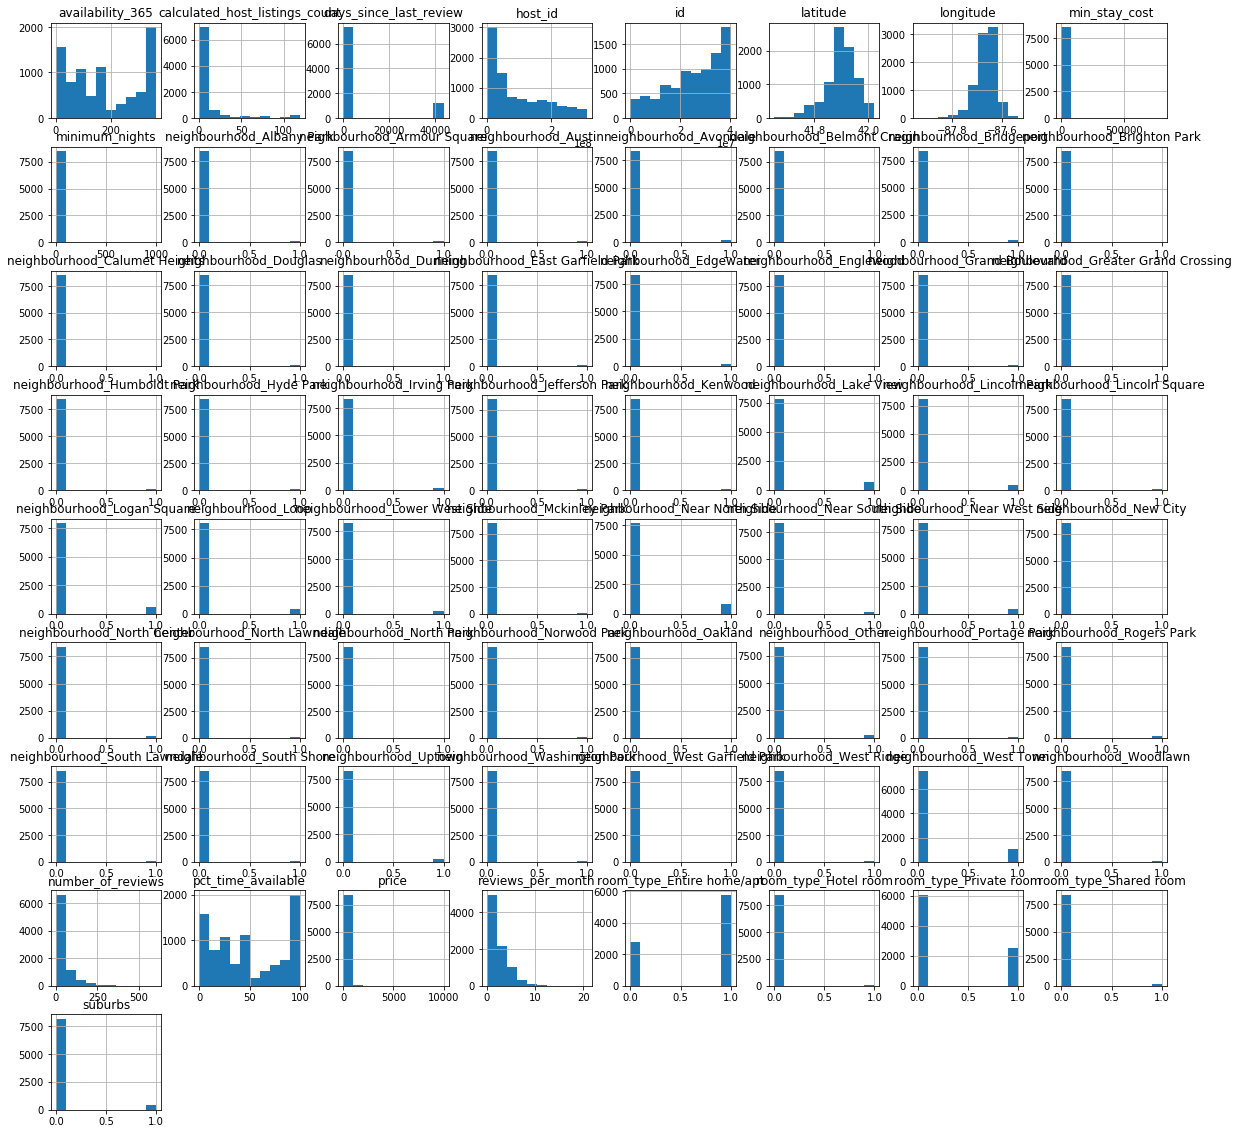

In [147]:
# Pre-outlier replacement behavior
dummy_df.hist(figsize=(20,20))

In [148]:
# Quantitative assessment of outliers for numeric variables
dummy_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,suburbs,neighbourhood_Albany Park,neighbourhood_Armour Square,neighbourhood_Austin,neighbourhood_Avondale,neighbourhood_Belmont Cragin,neighbourhood_Bridgeport,neighbourhood_Brighton Park,neighbourhood_Calumet Heights,neighbourhood_Douglas,neighbourhood_Dunning,neighbourhood_East Garfield Park,neighbourhood_Edgewater,neighbourhood_Englewood,neighbourhood_Grand Boulevard,neighbourhood_Greater Grand Crossing,neighbourhood_Humboldt Park,neighbourhood_Hyde Park,neighbourhood_Irving Park,neighbourhood_Jefferson Park,neighbourhood_Kenwood,neighbourhood_Lake View,neighbourhood_Lincoln Park,neighbourhood_Lincoln Square,neighbourhood_Logan Square,neighbourhood_Loop,neighbourhood_Lower West Side,neighbourhood_Mckinley Park,neighbourhood_Near North Side,neighbourhood_Near South Side,neighbourhood_Near West Side,neighbourhood_New City,neighbourhood_North Center,neighbourhood_North Lawndale,neighbourhood_North Park,neighbourhood_Norwood Park,neighbourhood_Oakland,neighbourhood_Other,neighbourhood_Portage Park,neighbourhood_Rogers Park,neighbourhood_South Lawndale,neighbourhood_South Shore,neighbourhood_Uptown,neighbourhood_Washington Park,neighbourhood_West Garfield Park,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,days_since_last_review,pct_time_available,min_stay_cost
count,8.533000e+03,8.533000e+03,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000
mean,2.568287e+07,9.136513e+07,41.900679,-87.664596,180.549162,5.577523,41.096215,2.165959,11.403375,177.255362,0.047463,0.011016,0.011368,0.008555,0.022266,0.004805,0.019454,0.003164,0.002344,0.009727,0.003516,0.010547,0.025196,0.002344,0.014532,0.003281,0.009024,0.013946,0.025196,0.005742,0.007852,0.084378,0.050275,0.014415,0.068206,0.054143,0.031525,0.004219,0.102543,0.021681,0.053205,0.002813,0.020743,0.005508,0.002578,0.003985,0.003399,0.029064,0.011954,0.020157,0.005860,0.010313,0.031993,0.004219,0.002930,0.010899,0.122817,0.012305,0.676433,0.012774,0.291574,0.019220,6234.699637,48.563196,951.753662
std,1.108914e+07,8.758527e+07,0.057041,0.041218,474.186707,21.054040,60.453440,2.132093,23.964151,130.468250,0.212639,0.104384,0.106018,0.092102,0.147558,0.069155,0.138122,0.056165,0.048359,0.098150,0.059193,0.102163,0.156730,0.048359,0.119676,0.057193,0.094570,0.117273,0.156730,0.075565,0.088267,0.277971,0.218525,0.119199,0.252113,0.226312,0.174741,0.064820,0.303379,0.145647,0.224456,0.052963,0.142531,0.074016,0.050714,0.063001,0.058202,0.167995,0.108683,0.140546,0.076328,0.101033,0.175993,0.064820,0.054051,0.103833,0.328247,0.110251,0.467864,0.112304,0.454514,0.137304,15169.017629,35.744703,9509.654971
min,2.384000e+03,2.140000e+03,41.650990,-87.934660,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [149]:
# Treat outliers - replace with medians
#Create list of columns to update 
extremes = ['calculated_host_listings_count', 'reviews_per_month', 'days_since_last_review', 'min_stay_cost', 'minimum_nights', 
            'number_of_reviews', 'price']

#Ensure they read as numerics
dummy_df[['calculated_host_listings_count', 'reviews_per_month', 'days_since_last_review', 'min_stay_cost', 'minimum_nights', 
            'number_of_reviews', 'price']] = dummy_df[['calculated_host_listings_count', 'reviews_per_month', 'days_since_last_review', 'min_stay_cost', 'minimum_nights', 
            'number_of_reviews', 'price']].apply(pd.to_numeric)

for column in dummy_df.columns:
    if column in extremes:
        q75 = dummy_df[column].quantile(0.75)
        q25 = dummy_df[column].quantile(0.25)
        iqr = q75 - q25
        lower = q25 - (iqr*3)
        upper = q75 + (iqr*3)
        median=dummy_df[column].median()
      
        # Replace values
        dummy_df[column]=dummy_df[column].mask(dummy_df[column] > upper, median)
        dummy_df[column]=dummy_df[column].mask(dummy_df[column] < lower, median)

# Modeling Phase
Question 1: What is the overall behavior of the Chicago Airbnb market?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228D1041C88>,
      dtype=object)

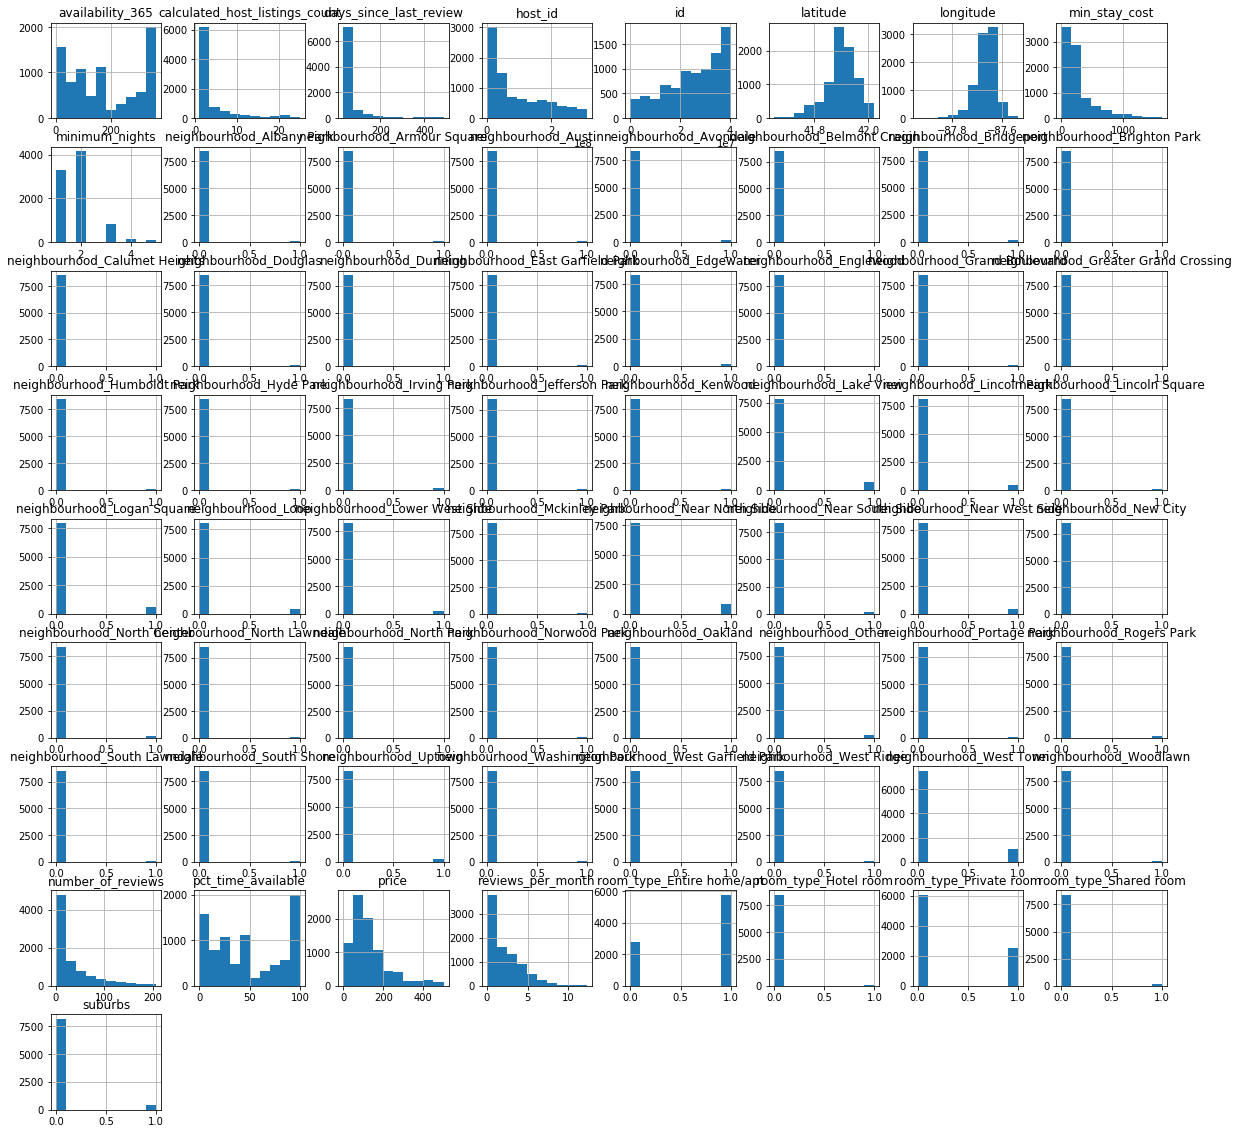

In [150]:
# Evaluate histograms again to see how behavior changed post replacement
dummy_df.hist(figsize=(20,20))

# Modeling Phase
Question 2: What is the Airbnb market like in West Town?

In [164]:
west_town_df = dummy_df.loc[dummy_df['neighbourhood_West Town'] == 1]

In [177]:
# Get descriptive stats
west_town_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,suburbs,neighbourhood_Albany Park,neighbourhood_Armour Square,neighbourhood_Austin,neighbourhood_Avondale,neighbourhood_Belmont Cragin,neighbourhood_Bridgeport,neighbourhood_Brighton Park,neighbourhood_Calumet Heights,neighbourhood_Douglas,neighbourhood_Dunning,neighbourhood_East Garfield Park,neighbourhood_Edgewater,neighbourhood_Englewood,neighbourhood_Grand Boulevard,neighbourhood_Greater Grand Crossing,neighbourhood_Humboldt Park,neighbourhood_Hyde Park,neighbourhood_Irving Park,neighbourhood_Jefferson Park,neighbourhood_Kenwood,neighbourhood_Lake View,neighbourhood_Lincoln Park,neighbourhood_Lincoln Square,neighbourhood_Logan Square,neighbourhood_Loop,neighbourhood_Lower West Side,neighbourhood_Mckinley Park,neighbourhood_Near North Side,neighbourhood_Near South Side,neighbourhood_Near West Side,neighbourhood_New City,neighbourhood_North Center,neighbourhood_North Lawndale,neighbourhood_North Park,neighbourhood_Norwood Park,neighbourhood_Oakland,neighbourhood_Other,neighbourhood_Portage Park,neighbourhood_Rogers Park,neighbourhood_South Lawndale,neighbourhood_South Shore,neighbourhood_Uptown,neighbourhood_Washington Park,neighbourhood_West Garfield Park,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,days_since_last_review,pct_time_available,min_stay_cost
count,1.048000e+03,1.048000e+03,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2.389566e+07,7.523657e+07,41.901362,-87.674789,135.219466,1.791031,42.552481,2.306803,3.143130,158.663168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.715649,0.018130,0.255725,0.010496,75.781489,43.469494,274.003817
std,1.133755e+07,8.439736e+07,0.006490,0.012480,88.175790,0.812531,49.248227,2.012827,3.947426,127.916491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451320,0.133484,0.436476,0.101960,72.287068,35.045519,256.985678
min,7.126000e+03,3.908000e+03,41.888930,-87.706600,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,20.000000
25%,1.520008e+07,1.098799e+07,41.896118,-87.684070,77.750000,1.000000,5.000000,0.650000,1.000000,54.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,42.000000,15.000000,115.000000
50%,2.538491e+07,3.811196e+07,41.900980,-87.673925,105.000000,2.000000,20.000000,1.940000,2.000000,132.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.000000,56.000000,36.160000,198.000000
75%,3.341580e+07,1.229450e+08,41.907023,-87.666005,163.000000,2.000000,66.000000,3.570

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228D37F0688>,
      dtype=object)

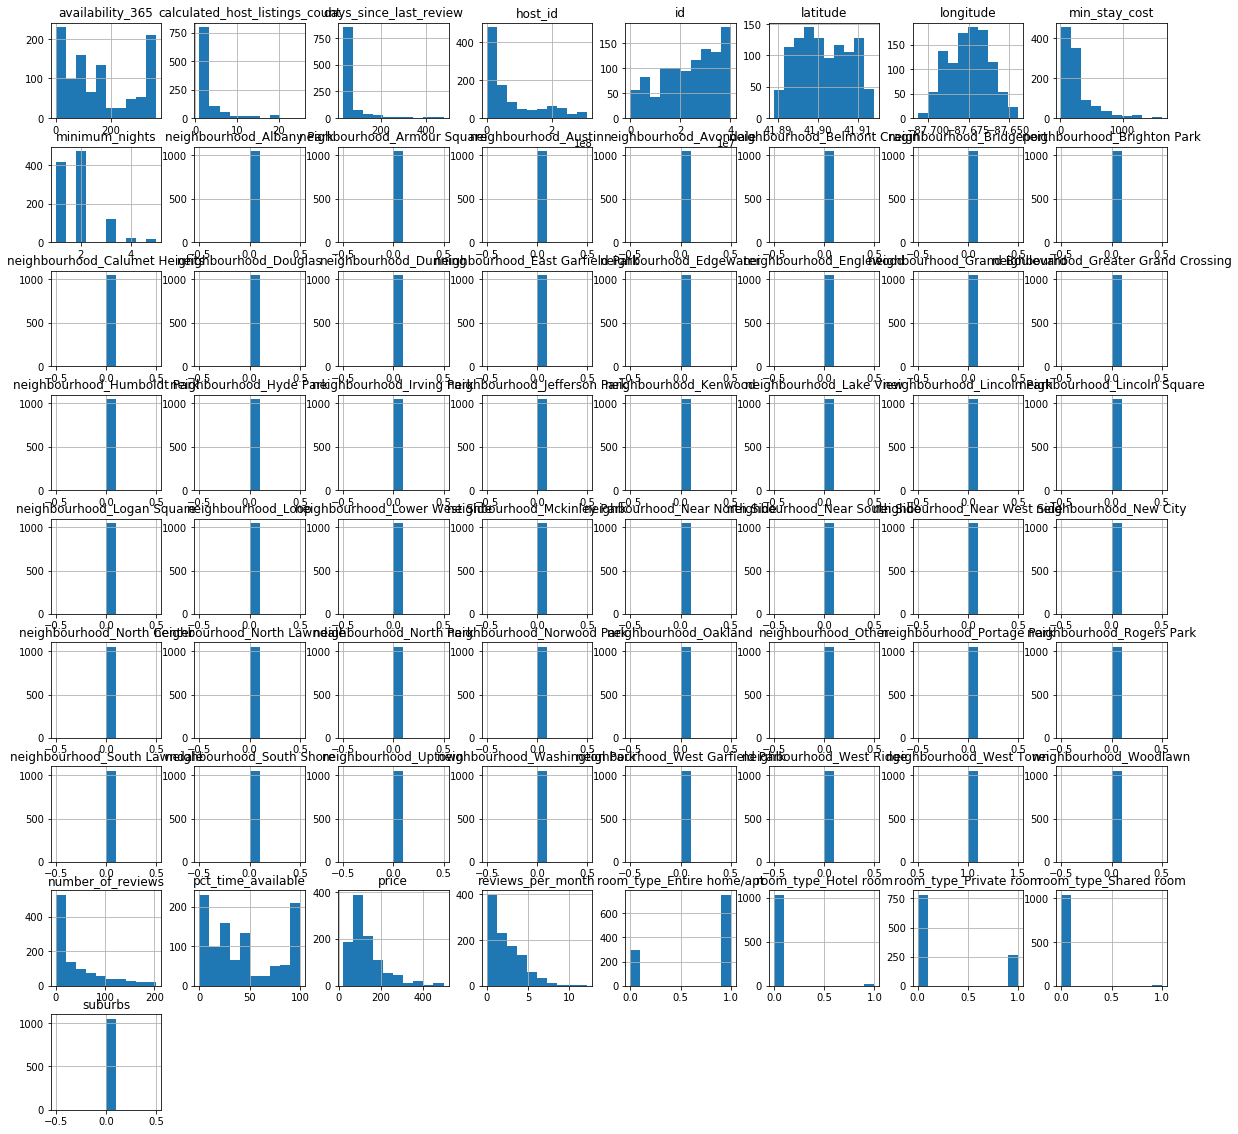

In [178]:
west_town_df.hist(figsize=(20,20))

In [188]:
# Evaluate types of properties
cols = ['room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']

for col in cols:
    print(col + 'count:')
    print(west_town_df[col].value_counts())

room_type_Entire home/aptcount:
1    750
0    298
Name: room_type_Entire home/apt, dtype: int64
room_type_Hotel roomcount:
0    1029
1      19
Name: room_type_Hotel room, dtype: int64
room_type_Private roomcount:
0    780
1    268
Name: room_type_Private room, dtype: int64
room_type_Shared roomcount:
0    1037
1      11
Name: room_type_Shared room, dtype: int64


# Modeling Phase
Question 3: How do West Town bookings compare to other popular neighborhoods?

In [201]:
# Create dataframe of top 3 neighborhoods with most bookings + West Town
near_north_df = dummy_df.loc[(dummy_df['neighbourhood_Near North Side'] == 1)] 
lake_view_df = dummy_df.loc[(dummy_df['neighbourhood_Lake View'] == 1)]
logan_sq_df = dummy_df.loc[(dummy_df['neighbourhood_Logan Square'] == 1)]

In [203]:
# Near North Summary Stats
near_north_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,suburbs,neighbourhood_Albany Park,neighbourhood_Armour Square,neighbourhood_Austin,neighbourhood_Avondale,neighbourhood_Belmont Cragin,neighbourhood_Bridgeport,neighbourhood_Brighton Park,neighbourhood_Calumet Heights,neighbourhood_Douglas,neighbourhood_Dunning,neighbourhood_East Garfield Park,neighbourhood_Edgewater,neighbourhood_Englewood,neighbourhood_Grand Boulevard,neighbourhood_Greater Grand Crossing,neighbourhood_Humboldt Park,neighbourhood_Hyde Park,neighbourhood_Irving Park,neighbourhood_Jefferson Park,neighbourhood_Kenwood,neighbourhood_Lake View,neighbourhood_Lincoln Park,neighbourhood_Lincoln Square,neighbourhood_Logan Square,neighbourhood_Loop,neighbourhood_Lower West Side,neighbourhood_Mckinley Park,neighbourhood_Near North Side,neighbourhood_Near South Side,neighbourhood_Near West Side,neighbourhood_New City,neighbourhood_North Center,neighbourhood_North Lawndale,neighbourhood_North Park,neighbourhood_Norwood Park,neighbourhood_Oakland,neighbourhood_Other,neighbourhood_Portage Park,neighbourhood_Rogers Park,neighbourhood_South Lawndale,neighbourhood_South Shore,neighbourhood_Uptown,neighbourhood_Washington Park,neighbourhood_West Garfield Park,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,days_since_last_review,pct_time_available,min_stay_cost
count,8.750000e+02,8.750000e+02,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.0,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,2.828012e+07,9.894129e+07,41.897094,-87.629701,182.182857,1.953143,20.411429,1.528537,5.531429,207.606857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.877714,0.050286,0.062857,0.009143,76.590857,56.878583,394.644571
std,9.850430e+06,8.699900e+07,0.005984,0.006767,102.685846,0.773620,34.720952,2.019900,6.488318,128.264051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327803,0.218659,0.242845,0.095235,64.730081,35.140752,308.481596
min,3.974200e+04,2.153000e+03,41.887600,-87.652100,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,20.000000
25%,2.257869e+07,1.910225e+07,41.892425,-87.634215,101.000000,2.000000,0.000000,0.000000,2.000000,84.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,49.000000,23.150000,200.000000
50%,3.138210e+07,6.331300e+07,41.896000,-87.630600,150.000000,2.000000,4.000000,0.620000,2.000000,237.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,60.000000,64.930000,220.000000
75%,3.606324e+07,1.707855e+08,41.900480,-87.625685,249.000000,2.000000,24.000000,2.545000,7.000000,333.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228D6A77108>,
      dtype=object)

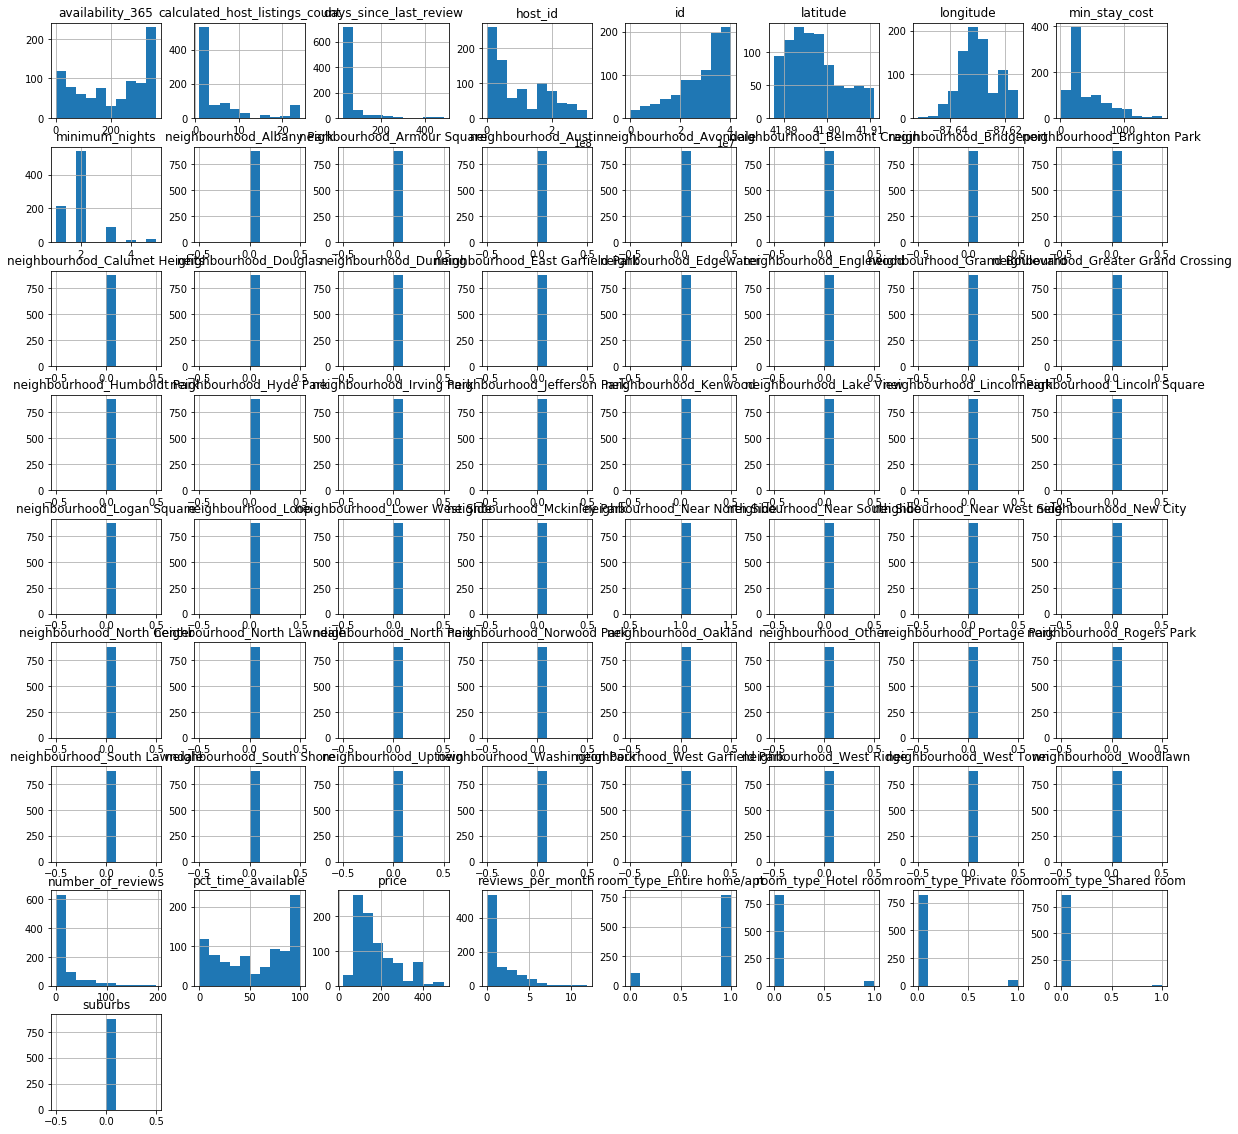

In [204]:
# Near North behavior
near_north_df.hist(figsize = (20, 20))

In [205]:
# Lake View descriptive stats
lake_view_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,suburbs,neighbourhood_Albany Park,neighbourhood_Armour Square,neighbourhood_Austin,neighbourhood_Avondale,neighbourhood_Belmont Cragin,neighbourhood_Bridgeport,neighbourhood_Brighton Park,neighbourhood_Calumet Heights,neighbourhood_Douglas,neighbourhood_Dunning,neighbourhood_East Garfield Park,neighbourhood_Edgewater,neighbourhood_Englewood,neighbourhood_Grand Boulevard,neighbourhood_Greater Grand Crossing,neighbourhood_Humboldt Park,neighbourhood_Hyde Park,neighbourhood_Irving Park,neighbourhood_Jefferson Park,neighbourhood_Kenwood,neighbourhood_Lake View,neighbourhood_Lincoln Park,neighbourhood_Lincoln Square,neighbourhood_Logan Square,neighbourhood_Loop,neighbourhood_Lower West Side,neighbourhood_Mckinley Park,neighbourhood_Near North Side,neighbourhood_Near South Side,neighbourhood_Near West Side,neighbourhood_New City,neighbourhood_North Center,neighbourhood_North Lawndale,neighbourhood_North Park,neighbourhood_Norwood Park,neighbourhood_Oakland,neighbourhood_Other,neighbourhood_Portage Park,neighbourhood_Rogers Park,neighbourhood_South Lawndale,neighbourhood_South Shore,neighbourhood_Uptown,neighbourhood_Washington Park,neighbourhood_West Garfield Park,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,days_since_last_review,pct_time_available,min_stay_cost
count,7.200000e+02,7.200000e+02,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2.338014e+07,7.359287e+07,41.944148,-87.655663,148.309722,1.651389,36.193056,2.180069,4.243056,160.580556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.734722,0.015278,0.220833,0.029167,76.204167,43.994597,297.281944
std,1.087496e+07,7.814480e+07,0.006010,0.008182,94.805283,0.732229,41.560589,2.060066,6.165369,134.145196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441788,0.122741,0.415097,0.168390,69.195808,36.752165,281.112062
min,1.448400e+05,3.167300e+04,41.932470,-87.673340,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,20.000000
25%,1.554856e+07,9.198695e+06,41.939615,-87.661437,85.000000,1.000000,6.000000,0.540000,1.000000,31.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,43.000000,8.700000,109.750000
50%,2.337404e+07,4.251802e+07,41.943810,-87.654550,120.000000,2.000000,19.500000,1.710000,2.000000,126.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,60.000000,34.655000,200.000000
75%,3.277678e+07,1.262252e+08,41.948508,-87.650078,195.000000,2.000000,49.250000,3.352500,4.000000,313.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228DA7D4408>,
      dtype=object)

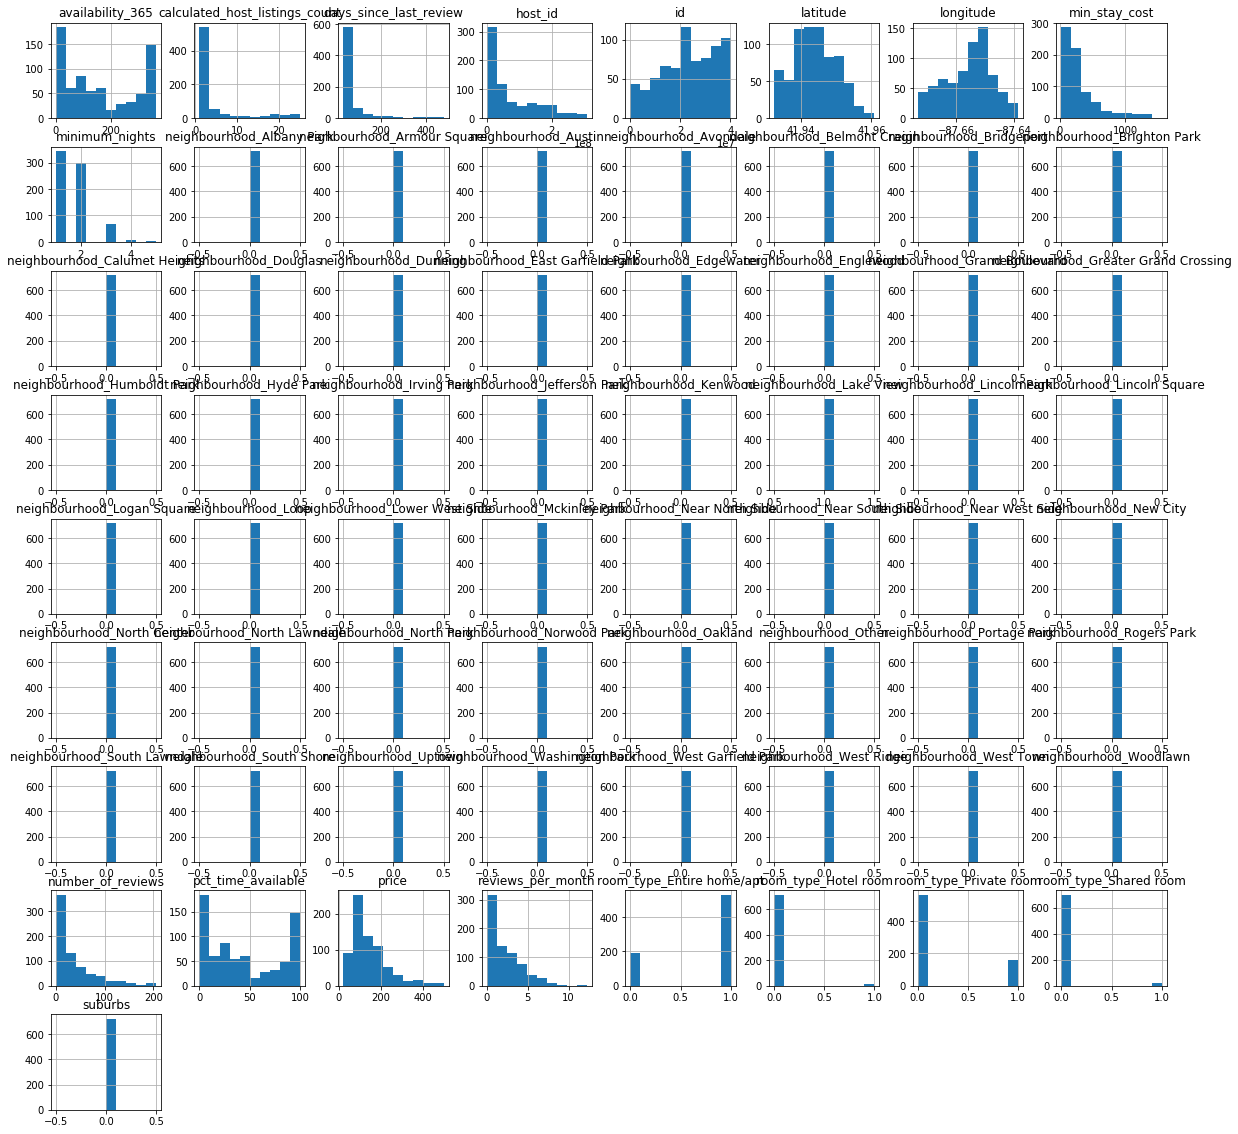

In [206]:
# Lake View histograms
lake_view_df.hist(figsize = (20, 20))

In [208]:
# Logan Square summary stats
logan_sq_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,suburbs,neighbourhood_Albany Park,neighbourhood_Armour Square,neighbourhood_Austin,neighbourhood_Avondale,neighbourhood_Belmont Cragin,neighbourhood_Bridgeport,neighbourhood_Brighton Park,neighbourhood_Calumet Heights,neighbourhood_Douglas,neighbourhood_Dunning,neighbourhood_East Garfield Park,neighbourhood_Edgewater,neighbourhood_Englewood,neighbourhood_Grand Boulevard,neighbourhood_Greater Grand Crossing,neighbourhood_Humboldt Park,neighbourhood_Hyde Park,neighbourhood_Irving Park,neighbourhood_Jefferson Park,neighbourhood_Kenwood,neighbourhood_Lake View,neighbourhood_Lincoln Park,neighbourhood_Lincoln Square,neighbourhood_Logan Square,neighbourhood_Loop,neighbourhood_Lower West Side,neighbourhood_Mckinley Park,neighbourhood_Near North Side,neighbourhood_Near South Side,neighbourhood_Near West Side,neighbourhood_New City,neighbourhood_North Center,neighbourhood_North Lawndale,neighbourhood_North Park,neighbourhood_Norwood Park,neighbourhood_Oakland,neighbourhood_Other,neighbourhood_Portage Park,neighbourhood_Rogers Park,neighbourhood_South Lawndale,neighbourhood_South Shore,neighbourhood_Uptown,neighbourhood_Washington Park,neighbourhood_West Garfield Park,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,days_since_last_review,pct_time_available,min_stay_cost
count,5.820000e+02,5.820000e+02,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.0,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,2.369114e+07,7.364970e+07,41.921785,-87.699448,125.714777,1.786942,45.068729,2.623007,2.166667,155.759450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.731959,0.001718,0.264605,0.001718,73.225086,42.673952,250.214777
std,1.129742e+07,7.878013e+07,0.004892,0.013247,87.870256,0.812532,49.115293,2.244299,2.473555,126.381279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443320,0.041451,0.441502,0.041451,68.124058,34.625030,243.209967
min,2.874900e+04,2.750600e+04,41.914100,-87.726790,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,23.000000
25%,1.492780e+07,1.224305e+07,41.917645,-87.710792,75.000000,1.000000,8.000000,0.682500,1.000000,55.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,42.000000,15.137500,100.000000
50%,2.440016e+07,3.791260e+07,41.921020,-87.699070,101.000000,2.000000,24.000000,2.410000,1.000000,130.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,56.000000,35.755000,197.000000
75%,3.416336e+07,1.229750e+08,41.925473,-87.688345,144.250000,2.000000,69.750000,3.977500,2.000000,270.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228DBF48948>,
      dtype=object)

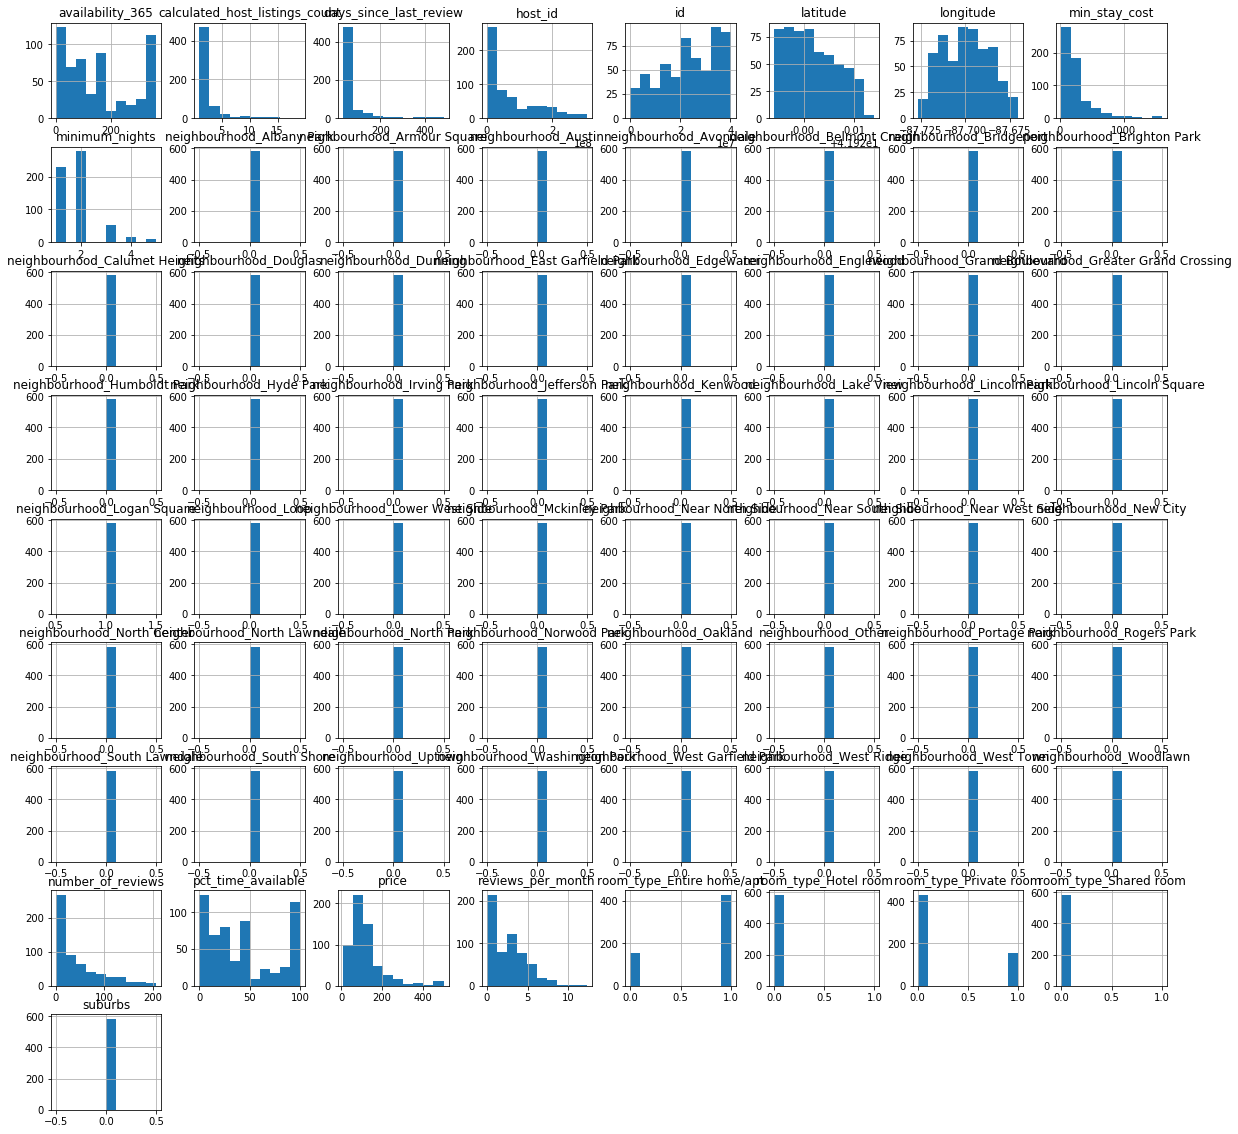

In [209]:
# LS Histograms
logan_sq_df.hist(figsize = (20, 20))